In [4]:
import numpy as np 
import pandas as pd 

In [5]:
import os
for dirname, _, filenames in os.walk('/Users/sundar-pt5584/Downloads/flowers'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/sundar-pt5584/Downloads/flowers/.DS_Store
/Users/sundar-pt5584/Downloads/flowers/daisy/14167534527_781ceb1b7a_n.jpg
/Users/sundar-pt5584/Downloads/flowers/daisy/34718882165_68cdc9def9_n.jpg
/Users/sundar-pt5584/Downloads/flowers/daisy/5512287917_9f5d3f0f98_n.jpg
/Users/sundar-pt5584/Downloads/flowers/daisy/476857510_d2b30175de_n.jpg
/Users/sundar-pt5584/Downloads/flowers/daisy/521762040_f26f2e08dd.jpg
/Users/sundar-pt5584/Downloads/flowers/daisy/33837577463_1ae52a3726_n.jpg
/Users/sundar-pt5584/Downloads/flowers/daisy/34638378196_216d5bbc2e_n.jpg
/Users/sundar-pt5584/Downloads/flowers/daisy/7320089276_87b544e341.jpg
/Users/sundar-pt5584/Downloads/flowers/daisy/8008258043_5457dd254b_n.jpg
/Users/sundar-pt5584/Downloads/flowers/daisy/721595842_bacd80a6ac.jpg
/Users/sundar-pt5584/Downloads/flowers/daisy/8719756744_34a5a83976_n.jpg
/Users/sundar-pt5584/Downloads/flowers/daisy/5110107234_12ddc0206b_m.jpg
/Users/sundar-pt5584/Downloads/flowers/daisy/20773528301_008fcbc5a1_n.jpg
/Users

In [8]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

2022-10-06 12:47:48.926799: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/Users/sundar-pt5584/Downloads/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/Users/sundar-pt5584/Downloads/flowers/sunflower'
FLOWER_TULIP_DIR='/Users/sundar-pt5584/Downloads/flowers/tulip'
FLOWER_DANDI_DIR='/Users/sundar-pt5584/Downloads/flowers/dandelion'
FLOWER_ROSE_DIR='/Users/sundar-pt5584/Downloads/flowers/rose'

In [10]:
def assign_label(img,flower_type):
    return flower_type

In [11]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [12]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 764/764 [00:02<00:00, 368.85it/s]

764


In [13]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 733/733 [00:02<00:00, 301.73it/s]

1497


In [14]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 984/984 [00:02<00:00, 337.13it/s]

2481


In [15]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1052/1052 [00:03<00:00, 348.69it/s]

3533


In [16]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 784/784 [00:02<00:00, 356.77it/s]

4317


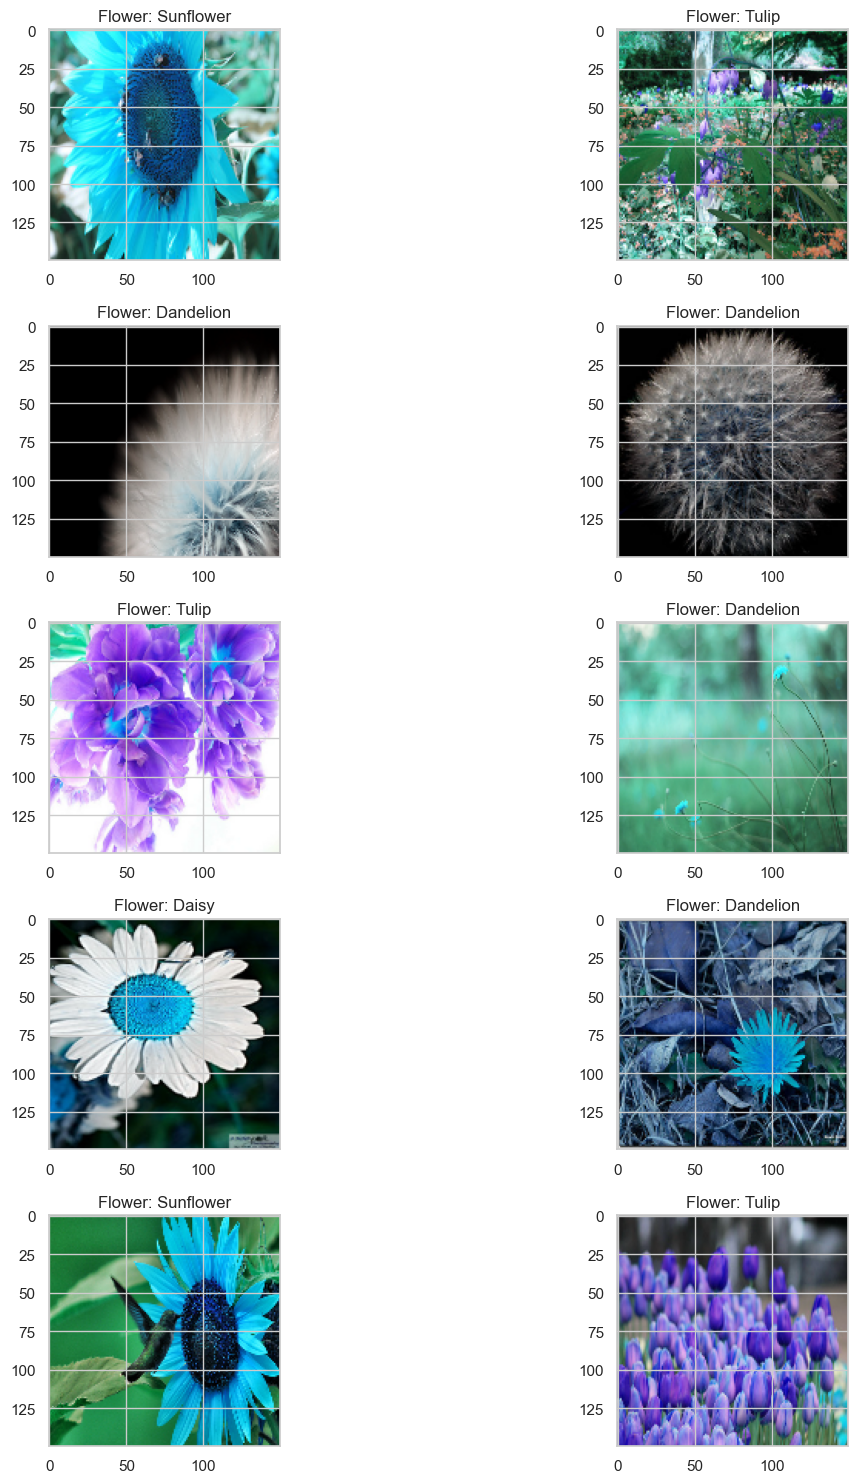

In [17]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [18]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [20]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [32]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [22]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [23]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [33]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 18, 96)      

In [26]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
25/25 [==============================] - 53s 2s/step - loss: 1.4300 - accuracy: 0.3628 - val_loss: 1.2314 - val_accuracy: 0.4954
Epoch 2/50
25/25 [==============================] - 57s 2s/step - loss: 1.2164 - accuracy: 0.4905 - val_loss: 1.0827 - val_accuracy: 0.5500
Epoch 3/50
25/25 [==============================] - 52s 2s/step - loss: 1.0904 - accuracy: 0.5555 - val_loss: 1.0275 - val_accuracy: 0.5815
Epoch 4/50
25/25 [==============================] - 51s 2s/step - loss: 1.0458 - accuracy: 0.5815 - val_loss: 0.9400 - val_accuracy: 0.6148
Epoch 5/50
25/25 [==============================] - 53s 2s/step - loss: 0.9645 - accuracy: 0.6301 - val_loss: 0.9156 - val_accuracy: 0.6389
Epoch 6/50
25/25 [==============================] - 55s 2s/step - loss: 0.9189 - accuracy: 0.6443 - val_loss: 0.8534 - val_accuracy: 0.6556
Epoch 7/50
25/25 [==============================] - 54s 2s/step - loss: 0.8777 - accuracy: 0.6652 - val_loss: 0.8475 - val_accuracy: 0.6574
Epoch 8/50
25/25 [==

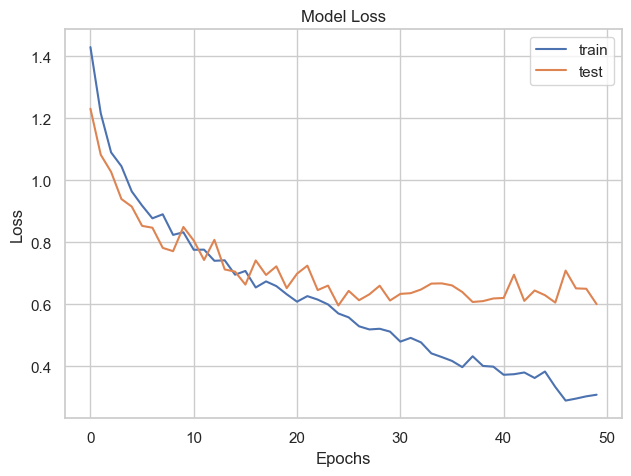

In [27]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

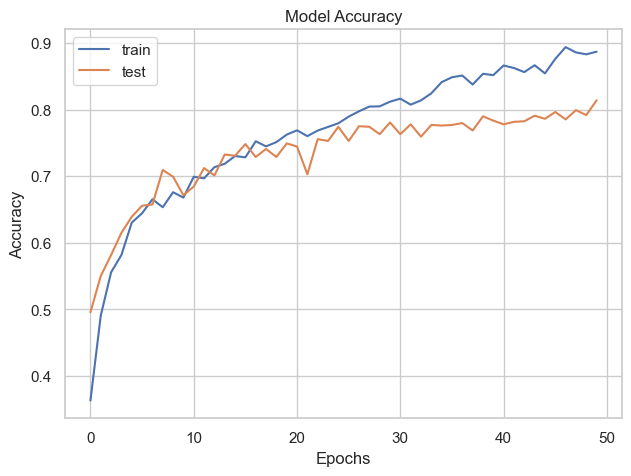

In [28]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()